In [1125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import percentileofscore

## огляд дати 

In [1126]:
df = pd.read_csv('testTask2.csv')
df.head()

,moderator,id_request,request_time,start_time,finish_time,team
0,165,159660,2020-09-24 7:01:16,2020-10-01 16:00:31,2020-10-01 16:02:02,retail
1,178,160116,2020-09-24 22:32:15,2020-10-01 13:21:42,2020-10-01 13:21:43,retail
2,187,160178,2020-09-25 2:58:13,2020-10-02 11:37:16,2020-10-02 11:41:56,wholesale
3,178,160306,2020-09-25 9:44:12,2020-10-02 7:23:09,2020-10-02 7:25:33,retail
4,178,163042,2020-09-30 15:56:08,2020-10-02 7:37:33,2020-10-02 7:47:57,retail


Кожне завдання старанний агент служби підтримки може виконувати до 5 хвилин з момента взяття в роботу.
З боку менеджменту є очікування, що в рамках кожного дня середній час від виникнення нового запиту користувача до відповіді має бути 15 хвилин. Також погано, якщо користувачі сервісу чекають на відповідь довше 45 хвилин.

Пояснення до колонок, які я додала нижче

**З боку менеджменту є очікування, що в рамках кожного дня середній час від виникнення нового запиту користувача до відповіді має бути 15 хвилин**

before_1_resp_min - чаc(хв) з моменту запиту користувача до першої відповіді (очікуємо, що цей час має бути в середньому 15 хвилин, погано, якщо 45)

solve_prblm_min - чаc(хв) на виконання запиту з моменту взяття його в роботу до остаточної відповіді (має бути до 5 хв)

In [1127]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['finish_time'] = pd.to_datetime(df['finish_time'])
df['request_time'] = pd.to_datetime(df['request_time'])
# df['before_1_resp_min'] = round((df['start_time'] - df['request_time']).dt.total_seconds()/60, 3)
# df['solve_prblm_min'] = round((df['finish_time'] - df['start_time']).dt.total_seconds()/60, 3)
# df["total_requests_by_mod"] = df.groupby("moderator")["id_request"].transform("count")




In [1128]:
df['before_1_resp_min'] = round((df['start_time'] - df['request_time']).dt.total_seconds()/60, 3)
df['solve_prblm_min'] = round((df['finish_time'] - df['start_time']).dt.total_seconds()/60, 3)
df["total_requests_by_mod"] = df.groupby("moderator")["id_request"].transform("count")
df.head()

,moderator,id_request,request_time,start_time,finish_time,team,before_1_resp_min,solve_prblm_min,total_requests_by_mod
0,165,159660,2020-09-24 07:01:16,2020-10-01 16:00:31,2020-10-01 16:02:02,retail,10619.250,1.517,698
1,178,160116,2020-09-24 22:32:15,2020-10-01 13:21:42,2020-10-01 13:21:43,retail,9529.450,0.017,630
2,187,160178,2020-09-25 02:58:13,2020-10-02 11:37:16,2020-10-02 11:41:56,wholesale,10599.050,4.667,1193
3,178,160306,2020-09-25 09:44:12,2020-10-02 07:23:09,2020-10-02 07:25:33,retail,9938.950,2.400,630
4,178,163042,2020-09-30 15:56:08,2020-10-02 07:37:33,2020-10-02 07:47:57,retail,2381.417,10.400,630


Дивлюсь протягом якого часу я маю дані (день, тиждень, місяць, рік)

Нижче я розділяю дані окремо на retail та wholesale

In [1129]:
retail_df = df[df['team'] == 'retail']
wholesale_df = df[df['team'] == 'wholesale']

Візуалізую, час очікування на першу відповідь у команди retail та команди wholesale

В обох командах видно великий правий хвіст, що означає, що частина запитів виконується більше, ніж 15 хвилин

Далі визначаю який персентиль, що відповідає значенню 15 хвилин (якраз те, що очікується менеджментом) в кожній з команд.

У retail команди це значення 17%, що означає, що тільки 17% запитів отримують першу відповідь протягом 15 хвилин, а всі інші 83% запитів отримують першу відповідь більш, ніж за 15 хвилин.

У wholesale команди це значення 2%, що означає, що тільки 2% запитів отримують першу відповідь протягом 15 хвилин, а всі інші 98% запитів отримують першу відповідь більш, ніж за 15 хвилин.



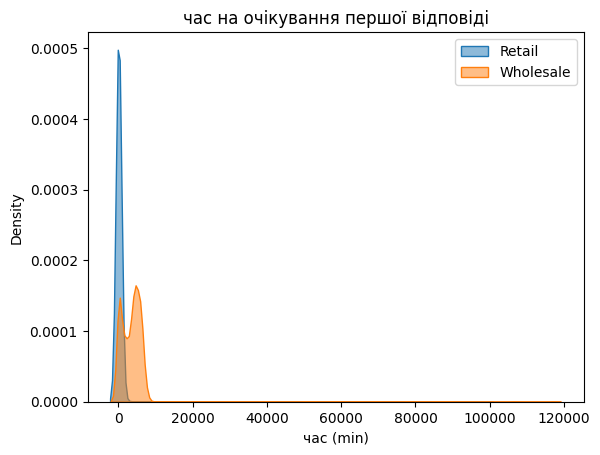

In [1130]:
sns.kdeplot(data=retail_df, x='before_1_resp_min', label='Retail', fill=True, alpha=0.5)
sns.kdeplot(data=wholesale_df, x='before_1_resp_min', label='Wholesale', fill=True, alpha=0.5)

# Add labels and legend
plt.xlabel('час (min)')
plt.title('час на очікування першої відповіді')
plt.legend()
plt.show()

In [1131]:
percentile_retail = percentileofscore(retail_df['before_1_resp_min'], 15)
percentile_wholesale = percentileofscore(wholesale_df['before_1_resp_min'], 15)
print("Відсоток користувачів, що очікують на першу відповідь менше ніж 15 хв")
print(f"У retail команди {round(percentile_retail, 2)}\nУ wholesale команди {round(percentile_wholesale, 2)}")

Відсоток користувачів, що очікують на першу відповідь менше ніж 15 хв
У retail команди 16.84
У wholesale команди 2.35


In [1132]:
percentile_retail = percentileofscore(retail_df['before_1_resp_min'], 45)
percentile_wholesale = percentileofscore(wholesale_df['before_1_resp_min'], 45)
print("Відсоток користувачів, що очікують на першу відповідь більше, ніж 45 хв")
print(f"У retail команди {round(100 - percentile_retail, 2)}\nУ wholesale команди {round(100 - percentile_wholesale, 2)}")

Відсоток користувачів, що очікують на першу відповідь більше, ніж 45 хв
У retail команди 52.94
У wholesale команди 94.85


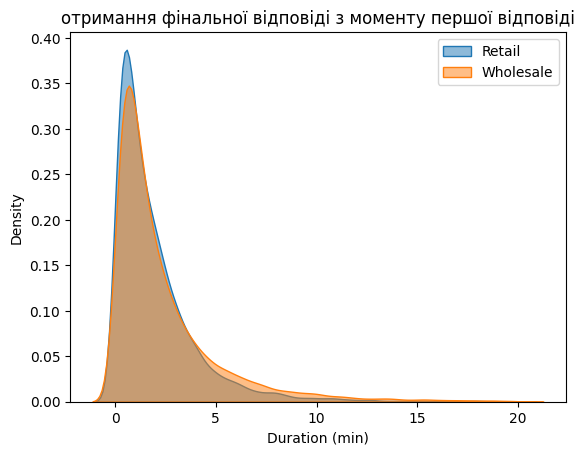

In [1133]:
sns.kdeplot(data=retail_df, x='solve_prblm_min', label='Retail', fill=True, alpha=0.5)
sns.kdeplot(data=wholesale_df, x='solve_prblm_min', label='Wholesale', fill=True, alpha=0.5)

# Add labels and legend
plt.xlabel('Duration (min)')
plt.title('отримання фінальної відповіді з моменту першої відповіді')
plt.legend()
plt.show()

In [1134]:
percentile_retail_f = percentileofscore(retail_df['solve_prblm_min'], 5)
percentile_wholesale_f = percentileofscore(wholesale_df['solve_prblm_min'],5)

print("Відсоток користувачів, що отримують фінальну відповідь менше за 5 хв")
print(f"У retail команди {round(percentile_retail_f, 2)}\nУ wholesale команди {round(percentile_wholesale_f, 2)}")

Відсоток користувачів, що отримують фінальну відповідь менше за 5 хв
У retail команди 92.35
У wholesale команди 87.34


## На яких агентів варто звернути увагу задля підвищення якості обслуговування?


перевіряю, чи є модератори, що працюють у двох командах

немає =)

In [1135]:
mod_in_two_teams = []
for mod in retail_df["moderator"].unique():
    if mod in wholesale_df["moderator"].unique():
        mod_in_two_teams.append(mod)
mod_in_two_teams

[]

In [1136]:
# медіанний час очікування у модераторів з retail
retail_moderators = retail_df.groupby("moderator")[["before_1_resp_min", "total_requests_by_mod"]].median().sort_values(by=["before_1_resp_min", "total_requests_by_mod"], ascending=False)
retail_moderators

,before_1_resp_min,total_requests_by_mod
moderator,,
133,439.0000,2.0
150,114.6500,16.0
173,75.7830,613.0
165,63.7415,698.0
141,62.7830,713.0
167,60.0665,536.0
136,55.5000,747.0
121,55.2670,799.0
164,53.3500,640.0


прибираю тих модераторів, які є викидами з точки зору виконаних запитів

я вважаю, що якщо запитів дуже мало, то можливо це взагалі стажери, які тренувались 

можна було би визначати викди і видаляти за користуючись таким правилом, але value < Q1 - 1.5 × IQR

value > Q3 + 1.5 × IQR
, але тоді воно видаляє людину, яка зробила 477 запитів, а я би не видаляла її

In [1137]:
q1_retail = retail_df["total_requests_by_mod"].quantile(0.25)
q3_retail = retail_df["total_requests_by_mod"].quantile(0.75)
iqr_retail = q3_retail - q1_retail

lower_bound = q1_retail - 1.5 * iqr_retail
upper_bound = q3_retail + 1.5 * iqr_retail

retail_no_outliers = retail_df[
    (retail_df["total_requests_by_mod"] >= lower_bound) &
    (retail_df["total_requests_by_mod"] <= upper_bound)
]

retail_mod_no_outlrs = retail_no_outliers.groupby("moderator")[["before_1_resp_min", "total_requests_by_mod"]].median().sort_values(by=["before_1_resp_min", "total_requests_by_mod"], ascending=False)


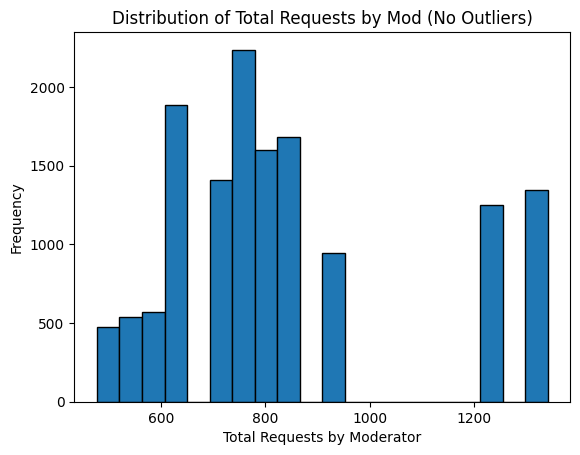

In [1138]:
plt.hist(retail_no_outliers["total_requests_by_mod"], bins=20, edgecolor='black')
plt.xlabel("Total Requests by Moderator")
plt.ylabel("Frequency")
plt.title("Distribution of Total Requests by Mod (No Outliers)")
plt.show()

In [1139]:
# медіанний час очіуквання у модераторів з wholesale
wholesale_moderators = wholesale_df.groupby("moderator")[["before_1_resp_min", "total_requests_by_mod"]].median().sort_values(by=["before_1_resp_min", "total_requests_by_mod"], ascending=False)
wholesale_moderators

,before_1_resp_min,total_requests_by_mod
moderator,,
126,5996.4500,2.0
180,4907.9330,1349.0
181,4576.5830,1625.0
187,4518.6830,1193.0
102,4489.0330,1321.0
112,4484.4000,1717.0
170,4378.8085,1686.0
149,3891.6830,751.0
123,3882.5330,1452.0


Ви аналітик даних у відділі Operational Excellence великого онлайн-маркетплейсу товарів. У складі маркетплейсу 2
сервіси:
Платформа для роздрібного продажу.
Платформа для гуртового продажу.

Після численних скарг про низьку якість роботи відділу підтримки, вам доручено проаналізувати, як можна покращити
рівень обслуговування клієнтів.

Вхідні дані:
Кожен продукт має свою команду підтримки.
Кожне завдання старанний агент служби підтримки може виконувати до 5 хвилин з момента взяття в роботу.
З боку менеджменту є очікування, що в рамках кожного дня середній час від виникнення нового запиту користувача до відповіді має бути 15 хвилин. Також погано, якщо користувачі сервісу чекають на відповідь довше 45 хвилин.

Проаналізуйте дані про роботу служби підтримки за період та запропонуйте шляхи для підвищення якості
обслуговування.

Орієнтовний (але не вичерпний) приклад запитань для відповідей:

Наскільки служба підтримки відповідає очікуванням менеджменту? Як вона працює зараз?

На яких агентів варто звернути увагу задля підвищення якості обслуговування?

Чи варто збільшити команду підтримки і наскільки?

Як варто змінити графік служби підтримки?

Чи є вигода від об'єднання команд?


Опис даних:
Таблиця events - дані про кожний запит до модерації. Містять в собі інформацію про сам запит та модератора, який його виконував.

id_request - унікальний ідентифікатор запиту;

moderator - унікальний ідентифікатор агента підтримки;

team - параметр команди (retail / wholesale);

request_time - час отримання запиту;

start_time - час початку обробки кейсу;

finish_time - час кінця обробки кейсу.

Результатом роботи мають бути:
1. Аргументовані висновки, підкріплені даними та графіками, оформлені в презентацію ~5-7 слайдів, сторінку в Notion чи Jupyter-ноутбук оформлений як презентація.
2. Файл з кодом/розрахунками.
